In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define file location
mouse_file = "../Resources/Mouse_metadata.csv"
results_file = "../Resources/Study_results.csv"

In [3]:
# Read in files to two DataFrames
mouse_df = pd.read_csv(mouse_file, encoding="utf8")
results_df = pd.read_csv(results_file, encoding="utf8")

In [4]:
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [5]:
results_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [6]:
# Check for duplicate timepoints with a single mouse ID and create a new column
results_df["Duplicate"] = results_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)

# Remove duplicates
results_reduced_df = results_df.loc[results_df["Duplicate"] == False, ["Mouse ID", "Timepoint", "Tumor Volume (mm3)",
                                                                      "Metastatic Sites"]]
results_reduced_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [7]:
# Identify duplicates
#results_df.loc[results_df["Duplicate"] == True, ["Mouse ID", "Timepoint", "Tumor Volume (mm3)","Metastatic Sites"]]

In [8]:
# Merge DataFrames 
merged_df = pd.merge(mouse_df, results_reduced_df, on="Mouse ID", how="left")
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1878,z969,Naftisol,Male,9,30,25,63.145652,2
1879,z969,Naftisol,Male,9,30,30,65.841013,3
1880,z969,Naftisol,Male,9,30,35,69.176246,4
1881,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
#merged_df.to_csv("merged_df.csv", header=True)

In [22]:
# Calculate mean of volume
mean_volume_df = merged_df.groupby("Drug Regimen").mean()

# Reset the index
mean_volume_df = mean_volume_df.reset_index()
# Remove other columns
mean_volume_df = mean_volume_df[["Drug Regimen", "Tumor Volume (mm3)"]]
# Rename column
mean_volume_df = mean_volume_df.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})

#mean_volume_df

In [23]:
# Calculate the median of the volume
median_volume_df = merged_df.groupby("Drug Regimen").median()

# Reset the index
median_volume_df = median_volume_df.reset_index()
# Remove other columns
median_volume_df = median_volume_df[["Drug Regimen", "Tumor Volume (mm3)"]]
# Rename column
median_volume_df = median_volume_df.rename(columns={"Tumor Volume (mm3)": "Median Tumor Volume"})

#median_volume_df

In [12]:
# Calculate the variance of the volume
variance_volume_df = merged_df.groupby("Drug Regimen").var()

# Reset the index
variance_volume_df = variance_volume_df.reset_index()
# Remove other columns
variance_volume_df = variance_volume_df[["Drug Regimen", "Tumor Volume (mm3)"]]
# Rename column
variance_volume_df = variance_volume_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Variance"})

#variance_volume_df

In [13]:
# Calculate Standard Deviation
std_volume_df = merged_df.groupby("Drug Regimen").std()

# Reset the index
std_volume_df = std_volume_df.reset_index()
# Remove other columns
std_volume_df = std_volume_df[["Drug Regimen", "Tumor Volume (mm3)"]]
# Rename column
std_volume_df = std_volume_df.rename(columns={"Tumor Volume (mm3)": "StD Tumor Volume"})

#std_volume_df

In [14]:
# Calculate Standard Error of the Mean
sem_volume_df = merged_df.groupby("Drug Regimen").sem()

# Reset the index
sem_volume_df = sem_volume_df.reset_index()
# Remove other columns
sem_volume_df = sem_volume_df[["Drug Regimen", "Tumor Volume (mm3)"]]
# Rename column
sem_volume_df = sem_volume_df.rename(columns={"Tumor Volume (mm3)": "SEM Tumor Volume"})

#sem_volume_df

In [20]:
# Merge tables on drug regimen (mean & median)
mean_median = pd.merge(mean_volume_df, median_volume_df, on="Drug Regimen")
#mean_median

In [16]:
# Merge tables on drug regimen (variance & standard deviation)
variance_std = pd.merge(variance_volume_df, std_volume_df, on="Drug Regimen")
#variance_std

In [17]:
# Merge tables on drug regimen (missing SEM)
summary_stats_0 = pd.merge(mean_median, variance_std, on="Drug Regimen")
#summary_stats_0

# Summary Statistics:

In [18]:
# Merge tables on drug regimen (all stats)
summary_stats_df = pd.merge(summary_stats_0, sem_volume_df, on="Drug Regimen")
summary_stats_df

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,StD Tumor Volume,SEM Tumor Volume
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [21]:
# Aggregation Method
#summary_stats_df.aggregate(func="mean")

In [124]:
# Create drug regimen dataframe 
drug_reg_df = merged_df[["Mouse ID", "Drug Regimen"]]

In [145]:
# Create a groupby for the total number of measurements taken per regimen
drug_reg_groupby = drug_reg_df.groupby("Drug Regimen").count()
drug_reg_groupby = drug_reg_groupby.reset_index()
drug_reg_groupby = drug_reg_groupby.rename(columns={"Mouse ID": "Total Measurements"})

drug_reg_groupby

,Drug Regimen,Total Measurements
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,151
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


In [146]:
measurements = []
labels = []

for x in drug_reg_groupby["Total Measurements"]:
    measurements.append(x)
for x in drug_reg_groupby["Drug Regimen"]:
    labels.append(x)

# Bar Charts:

## Plotly

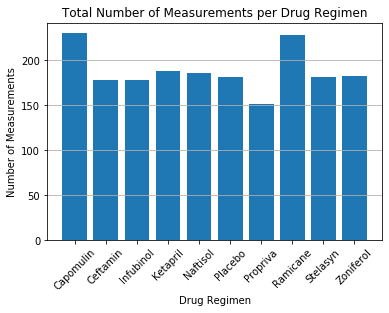

In [196]:
# Plotly Bar Chart
plt.bar(labels, measurements, align="center")

tick_locations = [value for value in range(0,10)]
plt.xticks(ticks=tick_locations, labels=labels, rotation=45)
plt.title("Total Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.grid(axis='y')
plt.ylim=[0,245]

plt.show()

## Pandas

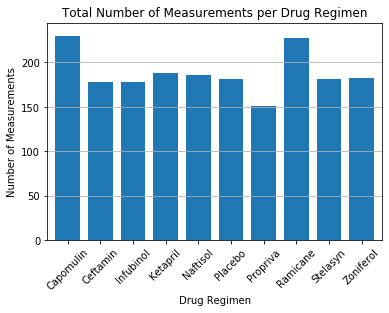

In [198]:
# Pandas Bar Chart
drug_reg_groupby.plot(kind='bar', legend=False, title="Total Number of Measurements per Drug Regimen",
                        rot='45', ylim=[0,245], width=0.75)

tick_locations = [value for value in range(0,10)]
plt.xticks(ticks=tick_locations, labels=labels)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.grid(axis='y')

plt.show()

In [112]:
# Create gender dataframe
gender_df = merged_df[["Mouse ID", "Sex"]]

In [111]:
# Create groupby dataframe for pie plots
gender_groupby = gender_df.groupby("Sex").count()
# Reset index
gender_groupby = gender_groupby.reset_index()
gender_groupby.head()

,Sex,Mouse ID
0,Female,925
1,Male,958


# Pie Charts:

## Pyplot

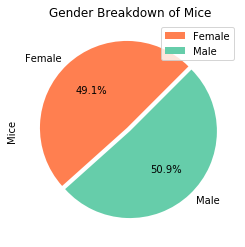

In [110]:
# Pyplot Pie chart
colors = ["coral", "mediumaquamarine"]
labels = ["Female", "Male"]
sizes = []
explode = [0.05, 0]

# Append numbers to sizes
for x in gender_groupby["Mouse ID"]:
    sizes.append(x)

plt.pie(sizes, colors=colors, labels=labels, explode=explode, startangle=45, autopct="%1.1f%%")
plt.title("Gender Breakdown of Mice")
plt.ylabel("Mice")
plt.legend(loc="best")

## Pandas

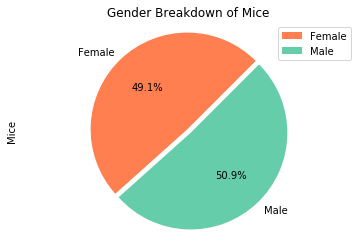

In [199]:
# Pandas Pie chart
colors = ["coral", "mediumaquamarine"]
gender_pie = gender_groupby.plot(kind="pie", y="Mouse ID", labels=gender_groupby["Sex"], startangle=45, 
                                 autopct="%1.1f%%", colors=colors, title="Gender Breakdown of Mice", explode=[0.05,0])
gender_pie.set_ylabel("Mice")
plt.axis("equal")
plt.show()

In [220]:
# Find 4 promising regimens and isolate into a dataframe
promising_regimens = merged_df.loc[(merged_df["Drug Regimen"] == "Capomulin") | (merged_df["Drug Regimen"] == "Ramicane") |
                              (merged_df["Drug Regimen"] == "Infubinol") | (merged_df["Drug Regimen"] == "Ceftamin"), :]
promising_regimens = promising_regimens.reset_index()

promising_regimens = promising_regimens[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]

promising_regimens

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,k403,Ramicane,45.000000
1,k403,Ramicane,38.825898
2,k403,Ramicane,35.014271
3,k403,Ramicane,34.223992
4,k403,Ramicane,32.997729
...,...,...,...
809,z581,Infubinol,54.316407
810,z581,Infubinol,56.286750
811,z581,Infubinol,58.628399
812,z581,Infubinol,60.053740
